# Ising spins on a ladder

$$
-\beta\mathcal{H} = K\sum^2_{n=1}\sum^M_{m=1}(S_{m,n}S_{m+1,n} + S_{m,n}S_{m,n+1})
$$
with periodic boundary condition

In [67]:
using Random
using StatsBase
using Plots
using Statistics
println("")

## Initiate Lattice

In [2]:
function InitLattice(N)
    #Lattice = ones(Int8, N) # all site is up
    #Lattice = -1 * ones(Int8, N) # all site is down
    Lattice = sample([-1, 1], Weights([1, 1]), N) # all site random
    #Lattice = collect(1:N) # for debug
    
    return Lattice
end

InitLattice (generic function with 1 method)

## Periodic Boundary Condition

In [37]:
function PeriodicBoundaryCondition(row, col)
    # All site has 3 of degrees
    adj = zeros(Int64, (row*col, 3))
    
    for i in 1:row
        for j in 1:col
            idx = (i-1)*col + j
            #Horizontal
            adj[idx, 1] = (i-1)*col + ((j + col) % col + 1)
            adj[idx, 2] = (i-1)*col + ((j + col - 2) % col + 1)
            #Vertical
            if i==1
                tmp3 = col + j
                adj[idx, 3] = col + j
            end
            if i==2
                tmp3 = j
                adj[idx, 3] = j
            end
        end
    end                
    return adj
end             

PeriodicBoundaryCondition (generic function with 1 method)

## Breadth First Search for Swendsen

In [90]:
function BFS_Swendsen(Lattice, adj, N, T)
    Queue = zeros(Int64, N+1) # Queue for BFS
    Cluster = zeros(Int64, N) # Cluster indexing of each nodes. 0 Value means that the node is not visited
    ClusterID = 0
    for idx in 1:N # search for all nodes
        if Cluster[idx] == 0 # If start node is not visited
            read = 1 # read pointer initialize
            write = 1 # write pointer initialize
            ClusterID+=1 # next cluster ID
            
            ndi = idx # start searching
            Queue[write] = ndi # stack queue
            write+=1 # move write pointer
            Cluster[ndi] = ClusterID # regist node into cluster
            
            while(read != write) # until queue is empty
                read+=1 # move read pointer
                for degree in 1:3 # all node has 3 of degrees
                    ndj = adj[ndi, degree] # choose one of neighbors
                    if Cluster[ndj] == 0 # If the neighbor node is not visited
                        if Lattice[ndi] == Lattice[ndj] # If two nodes have same spin
                            if rand(Float64) < (1 - exp(-10/T)) # With acceptance ratio
                                Cluster[ndj] = ClusterID
                                Queue[write] = ndj
                                write+=1
                            end
                        end
                    end
                end
                ndi = Queue[read]
            end
        end
    end
    
    return Cluster
end 

BFS_Swendsen (generic function with 1 method)

## Swendsen

In [91]:
function Swendsen(Lattice, adj, N, T)
    Cluster = BFS_Swendsen(Lattice, adj, N, T)
    nCluster = maximum(Cluster)
    newSpin = sample([-1, 1], Weights([1, 1]), nCluster)
    for idx in 1:N
        Lattice[idx] = newSpin[Cluster[idx]]
    end
end

Swendsen (generic function with 1 method)

## Value Setting

In [92]:
TList = collect(range(start=0.1, stop=5.0, length=50))
MCstep = 2000
K = 1.0

length = 2000    # length of ladder
N = length * 2 # number of site on ladder

4000

In [93]:
Lattice = InitLattice(N)
adj = PeriodicBoundaryCondition(2, length)
mList = Vector{Float64}()

for T in TList
    mStep = zeros(Float64, MCstep)
    for step in 1:MCstep
        Swendsen(Lattice, adj, N, T)
        mStep[step] = abs(sum(Lattice)/N)
    end
    m = sum(mStep)/MCstep
    append!(mList, m)
    print(T)
    print("    ")
    print(m)
    println("")
end




0.1    0.9967397499999999
0.2    1.0
0.3    1.0
0.4    1.0
0.5    1.0
0.6    1.0
0.7    1.0
0.8    1.0
0.9    1.0
1.0    1.0
1.1    1.0
1.2    1.0
1.3    1.0
1.4    1.0
1.5    1.0
1.6    1.0
1.7    1.0
1.8    1.0
1.9    0.999644
2.0    0.9978735000000001
2.1    0.99276375
2.2    0.99167875
2.3    0.97401675
2.4    0.9426185
2.5    0.91345075
2.6    0.8294747499999999
2.7    0.74511625
2.8    0.6666609999999998
2.9    0.5956442500000001
3.0    0.49643875
3.1    0.44911874999999996
3.2    0.39618000000000003
3.3    0.374669
3.4    0.33067650000000004
3.5    0.29968949999999994
3.6    0.27178474999999996
3.7    0.24879975000000001
3.8    0.23014374999999998
3.9    0.2133635
4.0    0.20390999999999998
4.1    0.1910205
4.2    0.179933
4.3    0.16716800000000004
4.4    0.16162824999999997
4.5    0.14903525
4.6    0.1397835
4.7    0.13139825
4.8    0.12357225
4.9    0.119244
5.0    0.11723425


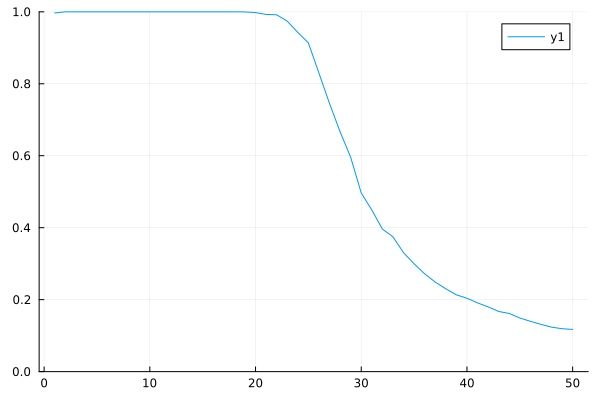

In [94]:
plot(1:50, mList)
ylims!(0.0, 1.0)